In [1]:
!pip install kaggle

In [6]:
data_path = '/content/drive/MyDrive/DTSC 5502/Movie Recommender System/IMDB-Dataset.csv'

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re,string,unicodedata
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet
import re
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

#Loading of Data

In [9]:
df = pd.read_csv(data_path)
df

FileNotFoundError: ignored

#Data Cleaning and Preprocessing

In [ ]:
import nltk
nltk.download('stopwords')

#Customize stopword as per data
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
new_stopwords = ["would","shall","could","might"]
stop_words.extend(new_stopwords)
stop_words.remove("not")  # we specifically want this in the text corpus as it will help to understand the emotion of the reviewer
stop_words=set(stop_words)
print(stop_words)

{'have', "wasn't", 'some', 'further', 'these', 'an', 'shan', 'won', 'ours', 'before', 'the', "didn't", 'would', 'such', 'will', 'd', "shan't", 'ma', 'if', "she's", 'once', "weren't", 'having', 'am', "you'll", 'after', 'shall', 'be', 'both', 'on', 'might', 'don', 'above', 'off', "hasn't", 'did', 'll', 'of', 'whom', 'while', "should've", 'wouldn', 't', 'yourself', 'why', 'when', 'has', 'myself', 'same', "hadn't", 'down', 'being', 'needn', 'weren', 'then', 'we', 'should', "it's", 'what', 'in', 'yourselves', 'had', "don't", 'your', 'more', "shouldn't", 'their', 've', 'doesn', "wouldn't", 'is', 'as', 'own', "mustn't", "you'd", 'few', 'each', 'and', 'under', 'about', 'at', 'y', 'our', 'those', 'aren', 'hasn', 'shouldn', 'hers', 'do', 'by', 'over', 'any', "couldn't", 'o', 're', 'isn', 'just', 'they', 'that', 'i', 'haven', "haven't", "mightn't", 'you', 'themselves', 'up', 'most', 'now', 'or', 's', 'from', 'are', 'too', 'been', 'again', "won't", 'ourselves', 'which', 'very', 'm', 'but', 'becaus

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
!pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 12.0 MB/s eta 0:00:00


In [ ]:
import contractions

# Download and load the pre-trained word embeddings model
x= contractions.fix("I can't believe we won't make it, it's going to be awesome!")
x

'I cannot believe we will not make it, it is going to be awesome!'

In [ ]:
#Removing special character
def remove_special_character(content):
    return re.sub('\W+',' ', content )#re.sub('\[[^&@#!]]*\]', '', content) '\W+' matches one or more non-word characters (e.g., punctuation, symbols)

# Removing URL's
def remove_url(content):
    return re.sub(r'http\S+', '', content)

#Removing the stopwords from text
def remove_stopwords(content):
    clean_data = []
    for i in content.split():
        if i.strip().lower() not in stop_words and i.strip().lower().isalpha():
            clean_data.append(i.strip().lower())
    return " ".join(clean_data)

# Expansion of english contractions
import contractions
def contraction_expansion(content):
    content = contractions.fix(content)
    return content

#Data preprocessing
def data_cleaning(content):
    content = contraction_expansion(content)
    content = remove_special_character(content)
    content = remove_url(content)

    content = remove_stopwords(content)
    return content

In [ ]:
%%time
pd.options.display.max_colwidth = 1000
#Data cleaning
df['Reviews_clean']=df['Reviews'].apply(data_cleaning)
df.head(5)

CPU times: user 50.3 s, sys: 238 ms, total: 50.5 s
Wall time: 51 s


,Ratings,Reviews,Movies,Resenhas,Reviews_clean
0,1.0,"*Disclaimer: I only watched this movie as a conditional agreement. And I see films for free. I wouldn't be caught dead giving my hard earned money to these idiots.Well, to explain the depth of this 'film', I could write my shortest review, ever. Don't see this movie. It is by far the stupidest, lamest, most lazy, and unbelievably UNFUNNY movie I have ever seen. It is a total disaster. But since my hatred for this movie, and the others like it, extends far beyond one viewing, I think I'll go on for a bit.I don't know any of the people in the movie besides Carmen Electra, Vanessa Minnillo, and Kim Kardashian, but it doesn't matter. They're all horrible, though I think that was the point. The editing is flat out horrible, and possibly blatant continuity errors make this crapfast even crappier than I thought it would be. Now I know that these films are not supposed to be serious at all, but come on, it's film-making 101 that if someone gets a minor facial cut, it should be there in the...",Disaster Movie,"* Isenção de responsabilidade: eu só assisti esse filme como um acordo condicional. E eu vejo filmes de graça. Eu não seria pego morto dando meu dinheiro suado a esses idiotas. Bem, para explicar a profundidade desse 'filme', eu poderia escrever minha crítica mais curta de todos os tempos. Não vê este filme. É de longe o filme mais estúpido, lamenta, preguiçoso e inacreditavelmente UNFUNNY que eu já vi. É um desastre total. Mas como o meu ódio por este filme e por outros, se estende muito além de uma exibição, acho que vou continuar um pouco. Não conheço nenhuma das pessoas do filme além de Carmen Electra, Vanessa Minnillo, e Kim Kardashian, mas isso não importa. Eles são todos horríveis, embora eu ache que esse seja o ponto. A edição é horrível e, possivelmente, erros de continuidade flagrantes tornam essa porcaria ainda mais horrível do que eu pensava. Agora eu sei que esses filmes não devem ser sérios, mas vamos lá, é o cinema 101 que se alguém fizer um pequeno corte facial, ele...",disclaimer watched movie conditional agreement see films free not caught dead giving hard earned money idiots well explain depth film write shortest review ever not see movie far stupidest lamest lazy unbelievably unfunny movie ever seen total disaster since hatred movie others like extends far beyond one viewing think go bit not know people movie besides carmen electra vanessa minnillo kim kardashian not matter horrible though think point editing flat horrible possibly blatant continuity errors make crapfast even crappier thought know films not supposed serious come film making someone gets minor facial cut next shot someone gets cut sword blood least cut though since narnia films get away give disaster movie pass jokes thoughtless mindless physical gags obviously take popular movies last year late well including best picture nominees know saddest thing stupid movies not care much money make many cameos sorry ass excuses films taking away jobs actors writers directors truly deserv...
1,1.0,"I am writing this in hopes that this gets put over the previous review of this ""film"". How anyone can find this slop entertaining is completely beyond me. First of all a spoof film entitled ""Disaster Movie"", should indeed be a spoof on disaster films. Now I have seen 1 (yes count them, 1) disaster film being spoofed, that being ""Twister"". How does Juno, Iron Man, Batman, The Hulk, Alvin and the Chipmunks, Amy Winehouse, or Hancock register as Disaster films? Selzterwater and Failburg once again have shown that they lack any sort of writing skill and humor. Having unfortunately been tortured with Date Movie and Epic Movie I know exactly what to expect from these two...no plot, no jokes just bad references and cheaply remade scenes from other films. Someone should have informed them that satire is more than just copy and paste from one film to another, though I shouldn't say that because some of these ac

#Data Overview

In [ ]:
#Checking for missing value
df.isna().sum()

Ratings           0
Reviews           0
Movies           25
Resenhas          0
Reviews_clean     0
dtype: int64

In [ ]:
df['Ratings'].describe()

count    150000.000000
mean          5.500000
std           2.872291
min           1.000000
25%           3.000000
50%           5.500000
75%           8.000000
max          10.000000
Name: Ratings, dtype: float64

In [ ]:
df['Reviews_clean'].describe()

count                                                                   150000
unique                                                                  149753
top       story soundtrack dialog graphic reasonableness entertainment overall
freq                                                                        10
Name: Reviews_clean, dtype: object

In [ ]:
print('Unique reviews:%s' % df.Reviews_clean.nunique())
print('Unique movie names:%s' % df.Movies.nunique())
print('No of ratings:%s'% df.Ratings.count())

Unique reviews:149753
Unique movie names:14206
No of ratings:150000


#Exploratory Data Analysis

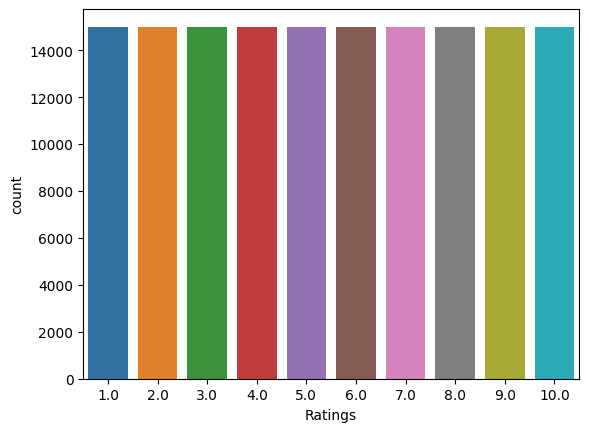

1.0     15000
2.0     15000
4.0     15000
3.0     15000
5.0     15000
6.0     15000
8.0     15000
7.0     15000
10.0    15000
9.0     15000
Name: Ratings, dtype: int64


In [ ]:
#Checking for Class Imbalance
sns.countplot(x=df['Ratings'])
plt.show()
print(df['Ratings'].value_counts())

Text(0.5, 1.0, 'Positive Reviews')

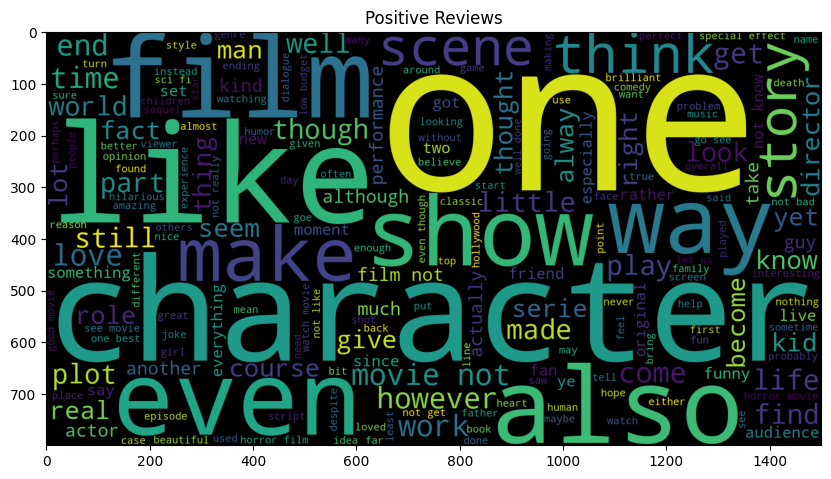

In [ ]:
'''----------------------------Visualization of Important Words from Positive Reviews--------------------'''
sentences=df['Reviews_clean']
pos=' '.join(map(str,sentences[df['Ratings']>=7]))
neg=' '.join(map(str,sentences[df['Ratings']<=4]))

pos_wordcloud = WordCloud(width = 1500, height = 800,
                background_color ='black',
                stopwords = stop_words,
                min_font_size = 15).generate(pos)

plt.figure(figsize=(10,10))
plt.imshow(pos_wordcloud)
plt.title('Positive Reviews')

(-0.5, 1499.5, 799.5, -0.5)

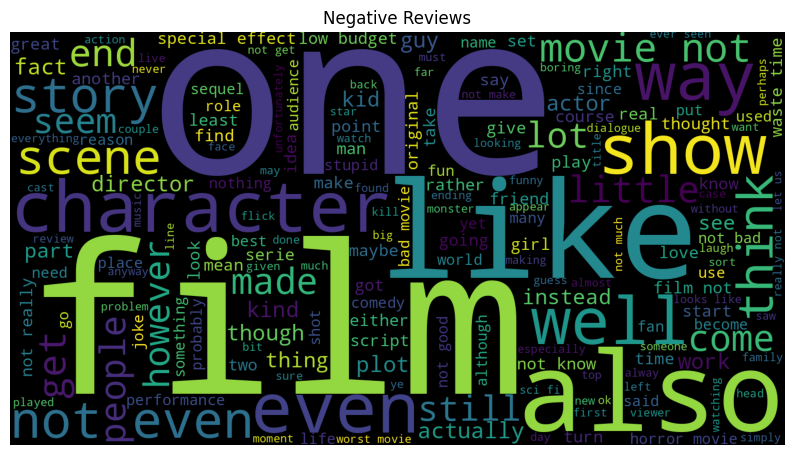

In [ ]:
'''----------------------------Visualization of Important Words from Negative Reviews--------------------'''

neg_wordcloud = WordCloud(width = 1500, height = 800,
                background_color ='black',
                stopwords = stop_words,
                min_font_size = 15).generate(neg)

plt.figure(figsize=(10,10))
plt.imshow(neg_wordcloud)
plt.title('Negative Reviews')
plt.axis('off')

#Basic Statistic of Review data

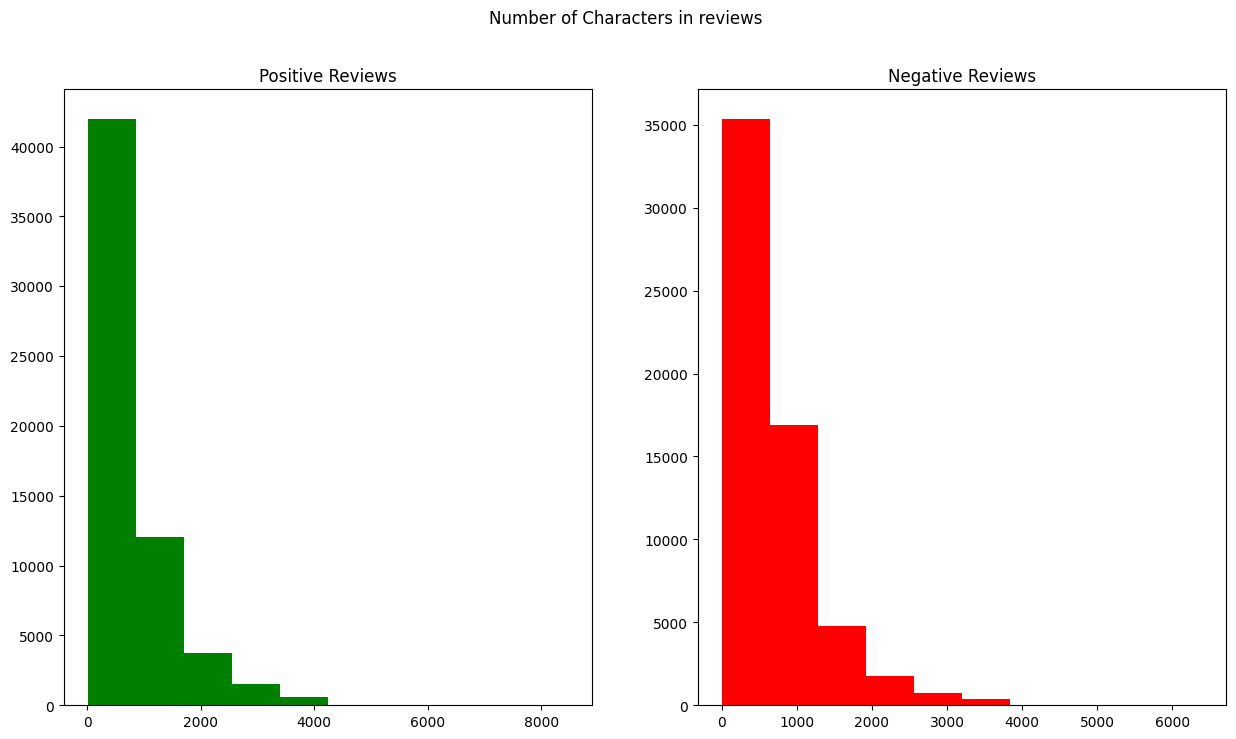

In [ ]:
#Visulaization of number of charactor in reviews
figure,(pos_ax,neg_ax)=plt.subplots(1,2,figsize=(15,8))
len_pos_review=df[df['Ratings']>=7]['Reviews_clean'].str.len()
pos_ax.hist(len_pos_review,color='green')
pos_ax.set_title('Positive Reviews')
len_neg_review=df[df['Ratings']<=4]['Reviews_clean'].str.len()
neg_ax.hist(len_neg_review,color='red')
neg_ax.set_title('Negative Reviews')
figure.suptitle('Number of Characters in reviews')
plt.show()

In [ ]:
len_pos_review

48406      934
90001     1446
90002      457
90003     1636
90004      567
          ... 
149995    3467
149996     335
149997    1518
149998    1444
149999     457
Name: Reviews_clean, Length: 60000, dtype: int64

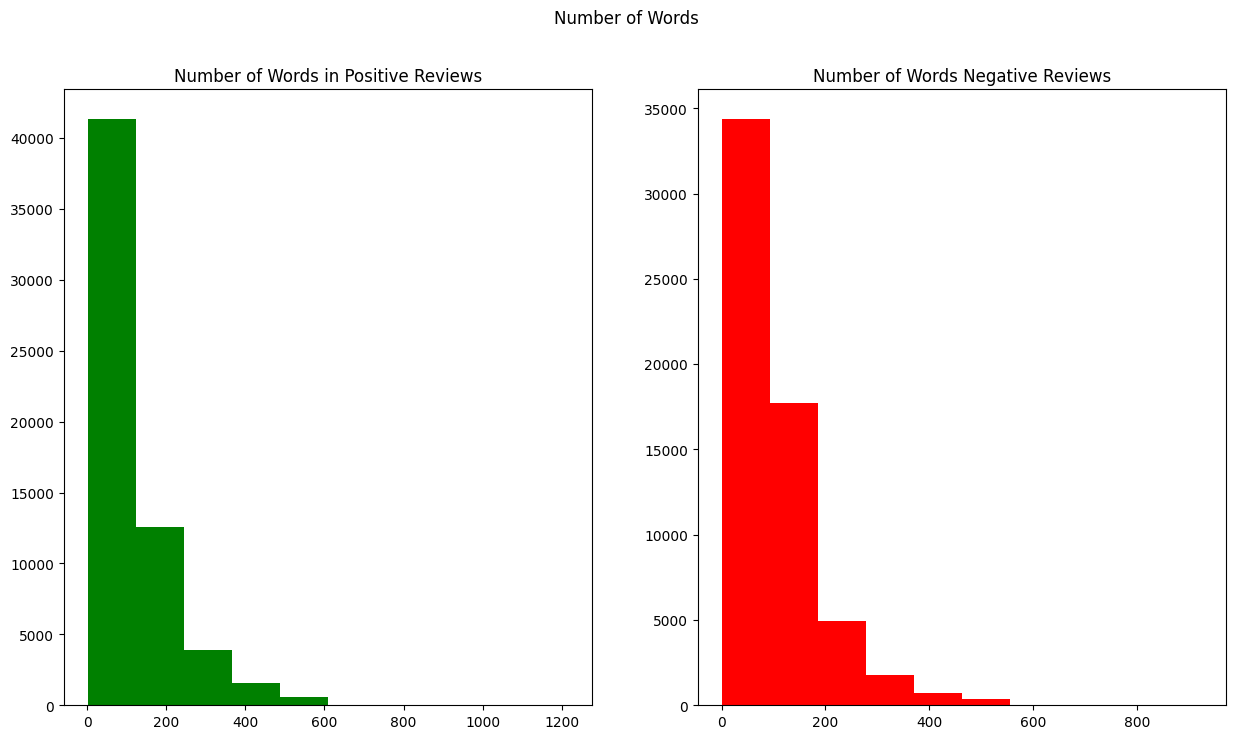

In [ ]:
#Visulaization of number of words in reviews
figure,(pos_ax,neg_ax)=plt.subplots(1,2,figsize=(15,8))
pos_word=df[df['Ratings']>=7]['Reviews_clean'].str.split().map(lambda review: len(review))
pos_ax.hist(pos_word,color='green')
pos_ax.set_title('Number of Words in Positive Reviews')
neg_word=df[df['Ratings']<=4]['Reviews_clean'].str.split().map(lambda review: len(review))
neg_ax.hist(neg_word,color='red')
neg_ax.set_title('Number of Words Negative Reviews')
figure.suptitle('Number of Words')
plt.show()

In [ ]:
pos_word

48406     139
90001     219
90002      70
90003     240
90004      87
         ... 
149995    493
149996     49
149997    224
149998    209
149999     73
Name: Reviews_clean, Length: 60000, dtype: int64

Text(0.5, 0.98, 'Average word length in Reviews')

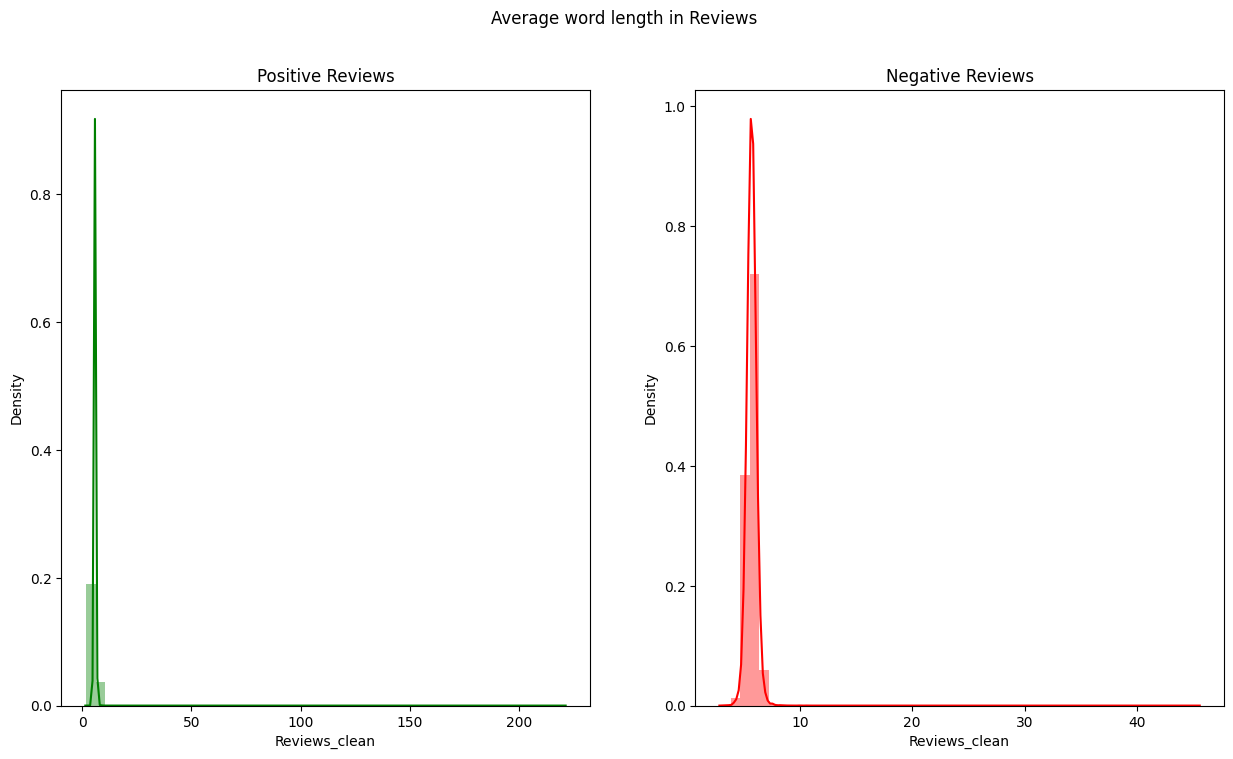

In [ ]:
#Visulaize average of words in reviews

figure,(pos_ax,neg_ax)=plt.subplots(1,2,figsize=(15,8))
pos_word=df[df['Ratings']>=7]['Reviews_clean'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(pos_word.map(lambda x: np.mean(x)),ax=pos_ax,color='green')
pos_ax.set_title('Positive Reviews')
neg_word=df[df['Ratings']<=4]['Reviews_clean'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(neg_word.map(lambda x: np.mean(x)),ax=neg_ax,color='red')
neg_ax.set_title('Negative Reviews')
figure.suptitle('Average word length in Reviews')

In [ ]:
pos_word

48406             [6, 6, 7, 3, 4, 3, 5, 5, 3, 9, 5, 4, 5, 5, 8, 5, 6, 4, 3, 5, 5, 6, 9, 12, 7, 4, 3, 4, 3, 5, 6, 6, 3, 7, 9, 7, 8, 4, 6, 9, 6, 6, 5, 9, 3, 6, 5, 6, 6, 8, 5, 4, 5, 6, 3, 7, 8, 5, 6, 5, 7, 7, 5, 9, 7, 3, 6, 6, 6, 5, 4, 5, 3, 5, 7, 7, 3, 3, 5, 4, 8, 8, 7, 9, 6, 5, 5, 6, 6, 4, 4, 3, 3, 10, 6, 8, 4, 4, 4, 9, ...]
90001         [5, 4, 3, 6, 9, 6, 8, 4, 6, 3, 4, 6, 2, 4, 6, 6, 9, 3, 4, 3, 4, 6, 8, 5, 5, 3, 4, 8, 4, 3, 6, 6, 4, 6, 6, 5, 9, 3, 4, 10, 9, 6, 3, 2, 6, 6, 7, 4, 8, 8, 5, 8, 6, 4, 5, 3, 4, 6, 5, 6, 7, 6, 10, 4, 6, 5, 6, 5, 3, 4, 7, 5, 2, 5, 6, 5, 5, 6, 7, 4, 6, 8, 5, 6, 6, 6, 6, 10, 7, 11, 7, 9, 11, 4, 4, 5, 10, 7, 6, 5, ...]
90002                                                                                                          [5, 4, 10, 6, 4, 9, 5, 5, 5, 3, 6, 4, 4, 4, 3, 7, 12, 4, 3, 6, 4, 5, 5, 6, 5, 5, 6, 4, 5, 6, 7, 3, 5, 6, 7, 5, 6, 12, 7, 7, 6, 4, 9, 5, 8, 4, 5, 5, 5, 3, 8, 6, 3, 5, 10, 8, 4, 8, 5, 3, 3, 9, 4, 6, 3, 5, 4, 5, 4, 6]
90003     [5, 4, 3, 5,

In [ ]:
#Get important feature by using Countvectorizer
def get_top_text_ngrams(corpus, n, g):
  # Create a CountVectorizer object with specified ngram range
    vec = CountVectorizer(ngram_range=(g, g)).fit(corpus)
    # Transform the given 'corpus' into a bag of words using the CountVectorizer
    bag_of_words = vec.transform(corpus)
    # print(bag_of_words)
    # Sum the occurrences of each word in the bag_of_words
    sum_words = bag_of_words.sum(axis=0)
    # print(sum_words)
    # Create a list of tuples containing words and their frequencies
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    # print(words_freq)
    # Sort the list in descending order based on word frequencies
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    # print(words_freq)
    # Return the top 'n' words and their frequencies
    return words_freq[:n]


In [ ]:
most_common_uni = get_top_text_ngrams(df.Reviews_clean[df['Ratings']>=7],20,1)
most_common_uni

[('not', 149484),
 ('movie', 127808),
 ('film', 98542),
 ('one', 60686),
 ('like', 50340),
 ('good', 46544),
 ('great', 34863),
 ('really', 33707),
 ('well', 33635),
 ('story', 33107),
 ('see', 32043),
 ('time', 28643),
 ('much', 25057),
 ('also', 25038),
 ('first', 24578),
 ('movies', 24425),
 ('people', 23745),
 ('even', 23405),
 ('get', 20976),
 ('watch', 20844)]

In [ ]:
most_common_uni = dict(most_common_uni)
temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(most_common_uni.keys())
temp["Count"] = list(most_common_uni.values())
fig = px.bar(temp, x="Count", y="Common_words", title='Commmon Words in Positive Reviews', orientation='h',
             width=700, height=700,color='Common_words')
fig.show()

In [ ]:
most_common_uni = get_top_text_ngrams(df.Reviews_clean[df['Ratings']>=7],20,2)
most_common_uni

[('movie not', 7104),
 ('film not', 4397),
 ('not know', 3815),
 ('special effects', 3733),
 ('one best', 3536),
 ('not like', 3528),
 ('not really', 2989),
 ('sci fi', 2717),
 ('even though', 2713),
 ('see movie', 2697),
 ('not get', 2659),
 ('low budget', 2617),
 ('good movie', 2592),
 ('not bad', 2541),
 ('let us', 2523),
 ('well done', 2388),
 ('go see', 2314),
 ('not think', 2262),
 ('watch movie', 2171),
 ('really good', 2140)]

In [ ]:
most_common_uni = dict(most_common_uni)
temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(most_common_uni.keys())
temp["Count"] = list(most_common_uni.values())
fig = px.bar(temp, x="Count", y="Common_words", title='Commmon bigram in Positive Reviews', orientation='h',
             width=700, height=700,color='Common_words')
fig.show()

In [ ]:
most_common_uni = get_top_text_ngrams(df.Reviews_clean[df['Ratings']>=7],20,3)
most_common_uni

[('go see movie', 490),
 ('not like movie', 387),
 ('not get wrong', 376),
 ('one best movies', 372),
 ('not take seriously', 369),
 ('cannot wait see', 364),
 ('people not like', 327),
 ('movie ever seen', 321),
 ('mario mario mario', 310),
 ('really enjoyed movie', 298),
 ('new york city', 295),
 ('seen long time', 290),
 ('one best films', 290),
 ('low budget film', 281),
 ('even though not', 273),
 ('not expecting much', 268),
 ('movies ever seen', 256),
 ('vote seven title', 255),
 ('seven title brazil', 254),
 ('best movie ever', 242)]

In [ ]:
most_common_uni = dict(most_common_uni)
temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(most_common_uni.keys())
temp["Count"] = list(most_common_uni.values())
fig = px.bar(temp, x="Count", y="Common_words", title='Commmon trigram in Positive Reviews', orientation='h',
             width=700, height=700,color='Common_words')
fig.show()

In [ ]:
pd.options.display.max_colwidth = 1000
df[["Reviews","Ratings","Movies"]][(df['Ratings']>=7)&(df['Reviews'].str.contains("not like| not want| not big fan"))].head()

,Reviews,Ratings,Movies
90193,"Starring: Carmen Electra and Brooke Hogan.Scary fish story that really has a lot going for it – Scares,Girls in bikinis and a creature that is NEW ! So let's go out to sea and study,No not like ""The Suite Life On Deck"",But more like Fred Olen Ray 'Showtime' movies in the water.There are villains without fins and people with Brains & Boobs.The creature effects are really good looking as CGI and just fun when do in real time and on set with actors interacting with the teeth plus.This ATOLL set would make a great tourist attraction with a re-tooled 'BRUCE the shark' that was replaced at Universal Studios,Florida.",7.0,2-Headed Shark Attack
90198,"Some folks really downgraded this movie and the two main stars, Casper Van Dien and Elelnia Eliniak by stating their careers were over because of this movie. Come on folks these two are professional actors and know how to act. This movie was not as horrible as some would have us believe nor did their careers end. Just because one did not like the movie is no reason to slam dunk the actors. The movie was actually quite good because of the two main stars It's quite conceivable for a character named Van Helsing not to know at one time in earths ancient culture he had a relative who was a vampire killer. As far as the script it was okay, the cinematography was good as far as one can be from being inside a spacecraft. The vampires exhibited great strength and stealth. They were tall dark and handsome or beautiful and tempting. In the end all the vampires were slain at the expense of most of the crew. To see which vampire remains and which crew members remain and how the movie ends which...",7.0,Dracula 3000
90222,"Alone in the Dark 2 is a fun little Supernatural Thriller with a good little cast & i enjoyed it, it looks like a movie & was actually filmed on film which was very rare back then, & even more rare now it's almost extinct, it's all digital now only ""Tarantino"" still uses film that I've heard of!!!\nAlso the film looks very good with good use of colour & a very slick look with lots of blue & green, a very cool opening actually with a view of new york city & central park, then we go down to central park where we meet 3 witch hunters running from the old Hag, it's very cool.\nThe first film was just ok, not great but not as terrible as all those way over the top reviews destroying it was saying, as there's alot of much worse films out there!!!\nThe music is really good, it's eerie & full of suspense & this little B-movie actually has a strong creepy atmosphere & feels like one of those rare Horror gems you find on t.v in the middle of the night, good solid film.""Alone in the Dark 2"" r...",7.0,Alone in the Dark II
90251,"You have to understand with these kinds of movies (boa vs. python,frankenfish, sasquatch hunters, rottweiler, tower of blood), you are not going to like it. You are going to think it was soo bad it was hilarious. Most importantly you cannot take it seriously as a movie. You have to also watch it with friends so you can all yell and say how stupid something was, or call something that is about to happen. I have seen about 8 movies like this one and I did not like one, but I had an amusing time watching it. WARNING: If you are looking for a scary movie or an interesting suspenseful movie DO NOT WATCH THIS! If you are on the other hand seeing something with friends, and you cant find a good comedy watch one of these. If you pick this movie out because you thought it would be cool, you should have been eliminated from the gene pool years ago. My personal favorite out of these 5 is sasquatch hunters, it was beyond helpless.",7.0,Boa vs. Python
90287,"OK, let's look past the fact that the director, Christina Peters (aka Kat Slater), went on to direct a profusion of pulsating porn including, but not limited to, ""Young Sluts, Inc."" 1 thru 15 and ""Cum Swappers"" 1 thru 4.Let's look past the fact that basically every review is slamming this

In [ ]:
most_common_uni = get_top_text_ngrams(df.Reviews_clean[df['Ratings']>=7],20,5)
most_common_uni = dict(most_common_uni)
temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(most_common_uni.keys())
temp["Count"] = list(most_common_uni.values())
fig = px.bar(temp, x="Count", y="Common_words", title='Commmon 5-gram in Positive Reviews', orientation='h',
             width=700, height=700,color='Common_words')
fig.show()

In [ ]:
pd.options.display.max_colwidth = 1000
df[["Reviews","Ratings","Movies"]][(df['Ratings']>=9)&(df['Reviews'].str.contains("bad review"))].head(30)

,Reviews,Ratings,Movies
120211,"This movie was a blast for my little guys, they loved every minute of it, I have read all of the bad reviews, and could not disagree more. This movie, is pure and good. There is just enough action to keep the kids interested, and not so much that you leave the theater with them bouncing off the walls either. It is funny with jokes that everyone can appreciate. I think people have gotten used to so much violence and adult content in our kids movies that they are disappointed when it is missing, like the movie wasn't entertaining enough for the parents. Well, NEWS FLASH.....It's a kids movie, and a perfect one at that. Kids need these kinds of movies, not Spongebob and the like which are more to entertain the parents.",9.0,Doogal
120238,"I am a huge horror buff and prefer pieces that delve into the characters psychological issues. This film was awesome on so many levels, the acting and writing were fantastic and creepy and I was afraid or and empathetic with the murderer the whole time. What an interesting study on the line between sick and a danger to others, and the line between being a mean girl and being psychotic. Set in a great location, a house full of creepy art, in the winter in Conneticut and with amazing performances from many of my favorite actresses. It actually shocks me that others have given this such a bad review, I loved this movie, I guess it goes to show you everyone will have a different opinion but I say don't miss this film!",9.0,#Horror
120239,"No idea why there are so many bad reviews here? I loved it; I thought it was a very advanced thoughtful film. The graphic were #killer. The comparison of video game culture and young girl culture was spot on. This film makes connections that I've never seen on the big screen but, do see in every day life.The casting was spot on, Hello 12 year-old girls are supposed to be a little annoying. I do wish that more directors would take color into more consideration the way this film does. T The highly stylized sets make the murder scenes more believable because everything is so unbelievable. How can you live in 2016 and not ""get""a film about social media and accelerationism. #duh Someone explain this to me.",9.0,#Horror
120273,"What do you get when you cross Love Story with Star Wars with Blade Runner with Back to the Future with MTV? Love Story 2050, that's what. What a fun movie for the entire family. This fantasy of epic proportions is much, much better than AI, a similar sci-fi classic. The thrills are non-stop in this blockbuster, from its lead off car chase to bike racing stunts to the vantage point of a moving roller coaster to speeding hover-craft--you will be on the edge of your seat from beginning to end. The version I saw was only partially in English and I still was glued to the screen. I can't wait to see a version with subtitles. The mega budget special effects are out of this world and highly convincing. The future vision of XBox was hilarious. Those who are complaining about how long this movie is simply don't understand Bollywood. The three hours went by quickly; it seemed to be only an hour. There could have been a better twist with the Darth Vader character. For example, I suspected tha...",9.0,Love Story 2050
120334,"I don't understand the negative reviews for this movie.This deserve a 10 stars.Something is definitely wrong with people when they do not care for a positive message in a movie.This movie was beyond great,had a touch of everything.It shows what can happen when a person's influence can change lives.These young boys had no hope,they could not see a promising future.The streets are what they knew,and of course,some of you can't relate, but if you are a fair person,then you will try to understand it from that viewpoint.I was not raised in a bad neighborhood,nor the streets, and i still totally get this movie.Life is about sacrifices and there were many a lessons in this movie that are based on real life for s

#Feature Engineering

In [ ]:
#Mapping rating data to Binary label 1 (+ve) if rating >=7 and 0 (-ve) if rating <=4 and 2 (neutral) if rating = 5 or 6
df['Label'] = df['Ratings'].apply(lambda x: '1' if x >= 7 else ('0' if x<=4 else '2'))
#Removing
df=df[df.Label<'2']
data=df[['Reviews_clean','Label']]
print(data['Label'].value_counts())

0    60000
1    60000
Name: Label, dtype: int64


In [ ]:
#Importing dependencies for feature engineering
import sys
import os
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from prettytable import PrettyTable
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

#Lemmatization

In [ ]:
# lemmatization of word
class LemmaTokenizer(object):
    def __init__(self):
        self.wordnetlemma = WordNetLemmatizer()
    def __call__(self, reviews):
        return [self.wordnetlemma.lemmatize(word) for word in word_tokenize(reviews)]

#Vectoization with Count Vectorizer and TDIDF Vectorizer with Unigram

In [ ]:
train,test=train_test_split(data,test_size=.3,random_state=42, shuffle=True)
countvect = CountVectorizer(analyzer = "word", tokenizer = LemmaTokenizer(), ngram_range=(1,1), min_df=10,max_features=500)
tfidfvect = TfidfVectorizer(analyzer = "word", tokenizer = LemmaTokenizer(), ngram_range=(1,1),min_df=10,max_features=500)
x_train_count = countvect.fit_transform(train['Reviews_clean']).toarray()
x_test_count = countvect.transform(test['Reviews_clean']).toarray()
x_train_tfidf = tfidfvect.fit_transform(train['Reviews_clean']).toarray()
x_test_tfidf = tfidfvect.transform(test['Reviews_clean']).toarray()
y_train = train['Label']
y_test = test['Label']

#Feature Importance with Logistic Regression and Count Vectorizer with unigram

In [ ]:
lgr = LogisticRegression()
lgr.fit(x_train_count,y_train)
lgr.score(x_test_count,y_test)
lgr.coef_[0]
i=0
importantfeature = PrettyTable(["Feature", "Score"])
for feature, importance in zip(countvect.get_feature_names_out(), lgr.coef_[0]):
    if i<=200:
        importantfeature.add_row([feature, importance])
        i=i+1
print(importantfeature)

+----------------+------------------------+
|    Feature     |         Score          |
+----------------+------------------------+
|      able      |  0.10372316238669792   |
|   absolutely   |  0.05386516128387451   |
|      act       |  -0.15131336213218724  |
|     acting     |  -0.16791572931104984  |
|     action     |  0.26511227288481504   |
|     actor      |  -0.12936197922359663  |
|    actress     |  -0.1432970759561257   |
|    actually    | -0.051713153926962865  |
|      add       |  0.026417195150627897  |
|     adult      |  0.05818637641143784   |
|      age       |  0.10064133298005012   |
|     alien      |  -0.07120548171673691  |
|     almost     | -0.015420637593221709  |
|     along      |  0.12190084089052211   |
|    already     |  -0.20815759712542345  |
|      also      |  0.09780023729908509   |
|    although    |  0.19528319413716008   |
|     always     |  0.19983625206893366   |
|    amazing     |   0.8413762806747149   |
|    american    |  0.0532002550

#Feature Importance with TFIDF vectorizer and Logistic Regression with Unigram

In [ ]:
lgr = LogisticRegression()
lgr.fit(x_train_tfidf,y_train)
lgr.score(x_test_tfidf,y_test)
lgr.coef_[0]
i=0
importantfeature = PrettyTable(["Feature", "Score"])
for feature, importance in zip(tfidfvect.get_feature_names_out(), lgr.coef_[0]):
    if i<=100:
        importantfeature.add_row([feature, importance])
        i=i+1
print(importantfeature)

+----------------+-----------------------+
|    Feature     |         Score         |
+----------------+-----------------------+
|      able      |   0.4022403204400423  |
|   absolutely   |  0.49031070948738936  |
|      act       |  -1.0213205207678606  |
|     acting     |   -1.661566500488301  |
|     action     |   2.6177532915797723  |
|     actor      |  -1.3603623986787285  |
|    actress     |  -0.9978771808462518  |
|    actually    |  -0.4840694897670116  |
|      add       |   0.1324672086876298  |
|     adult      |   0.6927584429224903  |
|      age       |   0.7692458879973532  |
|     alien      |  -0.33656061334839793 |
|     almost     |  -0.3132566655807393  |
|     along      |   0.7459857351556729  |
|    already     |  -1.1665138750767035  |
|      also      |   1.2253952444862757  |
|    although    |   1.213937108983249   |
|     always     |   1.7096080545694674  |
|    amazing     |   4.804432922929804   |
|    american    |  0.43884627361120465  |
|    annoyi

#Vectorization with Count Vectorizer and TDIDF Vectorizer with Bigram

In [ ]:
train,test=train_test_split(data,test_size=.3,random_state=42, shuffle=True)
countvect = CountVectorizer(analyzer = "word", tokenizer = LemmaTokenizer(), ngram_range=(2,2), min_df=10,max_features=500)
tfidfvect = TfidfVectorizer(analyzer = "word", tokenizer = LemmaTokenizer(), ngram_range=(2,2),min_df=10,max_features=500)
x_train_count = countvect.fit_transform(train['Reviews_clean']).toarray()
x_test_count = countvect.transform(test['Reviews_clean']).toarray()
x_train_tfidf = tfidfvect.fit_transform(train['Reviews_clean']).toarray()
x_test_tfidf = tfidfvect.transform(test['Reviews_clean']).toarray()
y_train = train['Label']
y_test = test['Label']

#Feature Importance with Logistic Regression and Count Vectorizer with Bigram

In [ ]:
lgr = LogisticRegression()
lgr.fit(x_train_count,y_train)
lgr.score(x_test_count,y_test)
lgr.coef_[0]
i=0
importantfeature = PrettyTable(["Feature", "Score"])
for feature, importance in zip(countvect.get_feature_names_out(), lgr.coef_[0]):
    if i<=200:
        importantfeature.add_row([feature, importance])
        i=i+1
print(importantfeature)

+-----------------------+-----------------------+
|        Feature        |         Score         |
+-----------------------+-----------------------+
|       acting bad      |  -1.3673272601835784  |
|      acting good      |   0.650418238249352   |
|       acting not      |  -0.4416951746879546  |
|      action film      |  0.36910341717185696  |
|      action movie     |  0.29610889188974326  |
|     action packed     |   1.3431537310290078  |
|      action scene     |  0.17681470578550496  |
|    action sequence    |  0.09985794100769578  |
|     actor actress     |  -0.12286980500039109 |
|       actor not       |  -0.33893446262187543 |
|      almost every     |  -0.1279807691326596  |
|       along way       |   0.4845448296529986  |
|        also not       |  -0.16041215883497975 |
|      although not     |   0.5121156083060954  |
|     anything else     |  -0.31956639551065746 |
|        b movie        |  -0.08978477342006187 |
|       bad acting      |   -1.060264866569213  |


#Feature Importance with Logistic Regression and TFIDF Vectorizer with Bigram

In [ ]:
lgr.fit(x_train_tfidf,y_train)
lgr.score(x_test_tfidf,y_test)
lgr.coef_[0]
i=0
importantfeature = PrettyTable(["Feature", "Score"])
for feature, importance in zip(tfidfvect.get_feature_names_out(), lgr.coef_[0]):
    if i<=50:
        importantfeature.add_row([feature, importance])
        i=i+1
print(importantfeature)

+-----------------------+----------------------+
|        Feature        |        Score         |
+-----------------------+----------------------+
|       acting bad      | -3.0130574261423995  |
|      acting good      |  1.4712985355393833  |
|       acting not      | -1.2095533143373742  |
|      action film      |  1.2146255537141961  |
|      action movie     |  0.8529081520499134  |
|     action packed     |  3.030389558983369   |
|      action scene     |  0.4707776055561639  |
|    action sequence    | 0.29659185713561087  |
|     actor actress     | -0.2618190991223435  |
|       actor not       | -0.7931005916859785  |
|      almost every     | -0.27380962040245266 |
|       along way       |  1.0804297844641624  |
|        also not       |  -0.319740187743219  |
|      although not     |  1.1471288436296387  |
|     anything else     | -0.8071425922078282  |
|        b movie        | -0.4296867573581509  |
|       bad acting      |  -2.816774431966567  |
|        bad bad    

In [ ]:
pd.options.display.max_colwidth = 1000
df[["Reviews","Ratings","Movies"]][(df['Ratings']>=9)&(df['Reviews_clean'].str.contains("bad review"))].head(100)

,Reviews,Ratings,Movies
120047,"While I wouldn't call this the greatest movie ever made, it's not anywhere near as bad as other reviewers have made it out to be. An average rating of 5 or 6 stars would be fair, but 1.5 is harsh and totally undeserved.Ring of Terror feels like an episode of The Twilight Zone stretched to an hour. In fact, it's so much like a TV show that one wonders if it might not have been originally created as a pilot.If you're a fan of 1950s horror/suspense series like Thriller, The Veil, One Step Beyond, Tales of Tomorrow, and Alfred Hitchcock Presents, you'll likely find this a pleasant way to spend an hour, as I did.Normally I would only give this film 6 out of 10 stars, but because others have been panning it so unmercifully, I'm giving it a 9.",9.0,Ring of Terror
120211,"This movie was a blast for my little guys, they loved every minute of it, I have read all of the bad reviews, and could not disagree more. This movie, is pure and good. There is just enough action to keep the kids interested, and not so much that you leave the theater with them bouncing off the walls either. It is funny with jokes that everyone can appreciate. I think people have gotten used to so much violence and adult content in our kids movies that they are disappointed when it is missing, like the movie wasn't entertaining enough for the parents. Well, NEWS FLASH.....It's a kids movie, and a perfect one at that. Kids need these kinds of movies, not Spongebob and the like which are more to entertain the parents.",9.0,Doogal
120238,"I am a huge horror buff and prefer pieces that delve into the characters psychological issues. This film was awesome on so many levels, the acting and writing were fantastic and creepy and I was afraid or and empathetic with the murderer the whole time. What an interesting study on the line between sick and a danger to others, and the line between being a mean girl and being psychotic. Set in a great location, a house full of creepy art, in the winter in Conneticut and with amazing performances from many of my favorite actresses. It actually shocks me that others have given this such a bad review, I loved this movie, I guess it goes to show you everyone will have a different opinion but I say don't miss this film!",9.0,#Horror
120239,"No idea why there are so many bad reviews here? I loved it; I thought it was a very advanced thoughtful film. The graphic were #killer. The comparison of video game culture and young girl culture was spot on. This film makes connections that I've never seen on the big screen but, do see in every day life.The casting was spot on, Hello 12 year-old girls are supposed to be a little annoying. I do wish that more directors would take color into more consideration the way this film does. T The highly stylized sets make the murder scenes more believable because everything is so unbelievable. How can you live in 2016 and not ""get""a film about social media and accelerationism. #duh Someone explain this to me.",9.0,#Horror
120273,"What do you get when you cross Love Story with Star Wars with Blade Runner with Back to the Future with MTV? Love Story 2050, that's what. What a fun movie for the entire family. This fantasy of epic proportions is much, much better than AI, a similar sci-fi classic. The thrills are non-stop in this blockbuster, from its lead off car chase to bike racing stunts to the vantage point of a moving roller coaster to speeding hover-craft--you will be on the edge of your seat from beginning to end. The version I saw was only partially in English and I still was glued to the screen. I can't wait to see a version with subtitles. The mega budget special effects are out of this world and highly convincing. The future vision of XBox was hilarious. Those who are complaining about how long this movie is simply don't understand Bollywood. The three hours went by quickly; it seemed to be only an hour. There could have been a better twist with the Darth Vader character. 

#Vectorization with Count Vectorizer and TDIDF Vectorizer with 4-gram

In [ ]:
train,test=train_test_split(data,test_size=.3,random_state=42, shuffle=True)
countvect = CountVectorizer(analyzer = "word", tokenizer = LemmaTokenizer(), ngram_range=(4,4), min_df=10,max_features=500)
tfidfvect = TfidfVectorizer(analyzer = "word", tokenizer = LemmaTokenizer(), ngram_range=(4,4),min_df=10,max_features=500)
x_train_count = countvect.fit_transform(train['Reviews_clean']).toarray()
x_test_count = countvect.transform(test['Reviews_clean']).toarray()
x_train_tfidf = tfidfvect.fit_transform(train['Reviews_clean']).toarray()
x_test_tfidf = tfidfvect.transform(test['Reviews_clean']).toarray()
y_train = train['Label']
y_test = test['Label']

#Feature Importance with Logistic Regression and Count Vectorizer with 4-gram

In [ ]:
lgr = LogisticRegression()
lgr.fit(x_train_count,y_train)
lgr.score(x_test_count,y_test)
lgr.coef_[0]
i=0
importantfeature = PrettyTable(["Feature", "Score"])
for feature, importance in zip(countvect.get_feature_names_out(), lgr.coef_[0]):
    if i<=200:
        importantfeature.add_row([feature, importance])
        i=i+1
print(importantfeature)

+------------------------------------------------+-----------------------+
|                    Feature                     |         Score         |
+------------------------------------------------+-----------------------+
|         according dvd sleeve synopsis          |  -2.2830302367445126  |
|           acting also great special            |   0.3593439339615729  |
|             acting bad script bad              |  -1.2268746164705933  |
|           also great special effect            |   0.7783977370983203  |
|       annoying illogical decision making       |  -0.04117293250221052 |
|           another film seen recently           |  -0.04398364396150131 |
|        atmosphere dreary due excessive         |  -0.0420918658511826  |
|            bad acting bad directing            |  -1.8528869500524725  |
|             bad acting bad script              |  -2.1444284310307946  |
|              bad acting bad story              |  -1.4907535683230673  |
|                bad bad 

#Feature Importance with Logistic Regression and TDIDF Vectorizer with 4-gram

In [ ]:
lgr = LogisticRegression()
lgr.fit(x_train_tfidf,y_train)
lgr.score(x_test_tfidf,y_test)
lgr.coef_[0]
i=0
importantfeature = PrettyTable(["Feature", "Score"])
for feature, importance in zip(tfidfvect.get_feature_names_out(), lgr.coef_[0]):
    if i<=200:
        importantfeature.add_row([feature, importance])
        i=i+1
print(importantfeature)

+------------------------------------------------+------------------------+
|                    Feature                     |         Score          |
+------------------------------------------------+------------------------+
|         according dvd sleeve synopsis          |  -2.2918440376956384   |
|           acting also great special            |   0.6638460305098784   |
|             acting bad script bad              |  -1.4041927827929663   |
|           also great special effect            |   1.0510223913034795   |
|       annoying illogical decision making       |  -0.23116959049293231  |
|           another film seen recently           |  -0.2494617489003514   |
|        atmosphere dreary due excessive         |  -0.26139090051134983  |
|            bad acting bad directing            |  -2.0691319703385993   |
|             bad acting bad script              |   -2.261357806088048   |
|              bad acting bad story              |   -1.512154486742637   |
|           

#Vectorization with Count Vectorizer and TDIDF Vectorizer with unigram, bigram and trigram

In [ ]:
train,test=train_test_split(data,test_size=.3,random_state=42, shuffle=True)
# countvect = CountVectorizer(analyzer = "word", tokenizer = LemmaTokenizer(), ngram_range=(1,3), min_df=10,max_features=5000)
tfidfvect = TfidfVectorizer(analyzer = "word", tokenizer = LemmaTokenizer(), ngram_range=(1,3),min_df=10,max_features=5000)
# x_train_count = countvect.fit_transform(train['Reviews_clean']).toarray()
# x_test_count = countvect.transform(test['Reviews_clean']).toarray()
x_train_tfidf = tfidfvect.fit_transform(train['Reviews_clean']).toarray()
x_test_tfidf = tfidfvect.transform(test['Reviews_clean']).toarray()
y_train = train['Label']
y_test = test['Label']

#Feature Selection with Chi squared

In [ ]:
from sklearn.feature_selection import chi2
import numpy as np
N = 5000
Number = 1
featureselection = PrettyTable(["Unigram", "Bigram","Trigram"])
for category in train['Label'].unique():
    features_chi2 = chi2(x_train_tfidf, train['Label'] == category)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidfvect.get_feature_names_out())[indices]
    unigrams = [x for x in feature_names if len(x.split(' ')) == 1]
    bigrams = [x for x in feature_names if len(x.split(' ')) == 2]
    trigrams = [x for x in feature_names if len(x.split(' ')) == 3]
    print("%s. %s :" % (Number,category))
    print("\t# Unigrams :\n\t. %s" %('\n\t. '.join(unigrams[-N:])))
    print("\t# Bigrams :\n\t. %s" %('\n\t. '.join(bigrams[-N:])))
    print("\t# Trigrams :\n\t. %s" %('\n\t. '.join(trigrams[-N:])))
    Number += 1

Streaming output truncated to the last 5000 lines.
	. returning
	. deliberately
	. jail
	. land
	. nicole
	. pre
	. strike
	. oil
	. spirited
	. forth
	. speaks
	. huge
	. claude
	. finding
	. join
	. flying
	. characterization
	. exorcism
	. spite
	. survivor
	. fairly
	. chief
	. appearance
	. football
	. sea
	. religious
	. item
	. tie
	. hook
	. freak
	. twin
	. steven
	. halloween
	. reporter
	. birthday
	. believed
	. posse
	. jay
	. energy
	. fare
	. judging
	. starring
	. rank
	. remaining
	. grey
	. comparison
	. chasing
	. colour
	. inspiration
	. vacation
	. broken
	. journalist
	. meaningful
	. going
	. club
	. confusion
	. shadow
	. african
	. professional
	. saturday
	. numerous
	. argue
	. starting
	. heavy
	. exchange
	. decides
	. needed
	. usa
	. cousin
	. virus
	. wow
	. whenever
	. quick
	. exaggerated
	. arrive
	. river
	. second
	. laura
	. road
	. air
	. traveling
	. accident
	. wise
	. person
	. ant
	. butt
	. pregnant
	. boot
	. rap
	. occur
	. class
	. tower
	

#Model Selection

In [ ]:
import sys
import numpy as np
import scipy as sp
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, roc_auc_score, precision_score, recall_score
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

#Logistic Regression Model

In [ ]:
model_1=LogisticRegression()

#Training of Logistic Regression Model

In [ ]:
model_1.fit(x_train_tfidf,y_train)

LogisticRegression()

#Evaluation on Test and Train dataset

In [ ]:
print("Precision Score on training dateset for Logistic Regression: %s" % precision_score(y_train,model_1.predict(x_train_tfidf),average='micro'))
print("AUC Score on training dateset for Logistic Regression: %s" % roc_auc_score(y_train,model_1.predict_proba(x_train_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_train_1 =f1_score(y_train,model_1.predict(x_train_tfidf),average="weighted")
print("F1 Score ftraining dateset for Logistic Regression: %s" % f1_score_train_1)
print("Precision Score on test for Logistic Regression: %s" % precision_score(y_test,model_1.predict(x_test_tfidf),average='micro'))
print("AUC Score on test for Logistic Regression: %s" % roc_auc_score(y_test,model_1.predict_proba(x_test_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_1 =f1_score(y_test,model_1.predict(x_test_tfidf),average="weighted")
print("F1 Score for Logistic Regression: %s" % f1_score_1)

Precision Score on training dateset for Logistic Regression: 0.90975
AUC Score on training dateset for Logistic Regression: 0.9687515785376477
F1 Score ftraining dateset for Logistic Regression: 0.9097485858098077
Precision Score on test for Logistic Regression: 0.8931388888888889
AUC Score on test for Logistic Regression: 0.9582531366675886
F1 Score for Logistic Regression: 0.8931408018167248


#Decision Tree Classifier

In [ ]:
model_2 = Pipeline(
    steps=[
        #("classifier", DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)),
    ("classifier", DecisionTreeClassifier())
    ]
)

#Training of Decision Tree Classifier

In [ ]:
model_2.fit(x_train_tfidf,y_train)

Pipeline(steps=[('classifier', DecisionTreeClassifier())])

#Evaluation on test data and training data of Decision Tree Classifier

In [ ]:
print("Precision Score on training dateset for Decision Tree Classifier: %s" % precision_score(y_train,model_2.predict(x_train_tfidf),average='micro'))
print("AUC Score on training dateset for Decision Tree Classifier: %s" % roc_auc_score(y_train,model_2.predict_proba(x_train_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_train_2 =f1_score(y_train,model_2.predict(x_train_tfidf),average="weighted")
print("F1 Score training dateset for Decision Tree Classifier: %s" % f1_score_train_2)
print("Precision Score on test for Decision Tree Classifier: %s" % precision_score(y_test,model_2.predict(x_test_tfidf),average='micro'))
print("AUC Score on test for Decision Tree Classifier: %s" % roc_auc_score(y_test,model_2.predict_proba(x_test_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_2 =f1_score(y_test,model_2.predict(x_test_tfidf),average="weighted")
print("F1 Score for Decision Tree Classifier: %s" % f1_score_2)

Precision Score on training dateset for Decision Tree Classifier: 0.9999642857142857
AUC Score on training dateset for Decision Tree Classifier: 0.9999999934806311
F1 Score training dateset for Decision Tree Classifier: 0.9999642857190992
Precision Score on test for Decision Tree Classifier: 0.7174722222222222
AUC Score on test for Decision Tree Classifier: 0.7177273003669425
F1 Score for Decision Tree Classifier: 0.7174777854577227


#Decision Tree Classifier with max depth 11 to fix overfit

In [ ]:
model_3 = Pipeline(
    steps=[
        ("classifier", DecisionTreeClassifier( criterion='gini', max_depth=11, min_samples_split=2, min_samples_leaf=1)),
    ]
)

In [ ]:
model_3.fit(x_train_tfidf,y_train)

Pipeline(steps=[('classifier', DecisionTreeClassifier(max_depth=11))])

In [ ]:
print("Precision Score on training dateset for Decision Tree Classifier: %s" % precision_score(y_train,model_3.predict(x_train_tfidf),average='micro'))
print("AUC Score on training dateset for Decision Tree Classifier: %s" % roc_auc_score(y_train,model_3.predict_proba(x_train_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_train_3 =f1_score(y_train,model_3.predict(x_train_tfidf),average="weighted")
print("F1 Score training dateset for Decision Tree Classifier: %s" % f1_score_train_3)
print("Precision Score on test for Decision Tree Classifier: %s" % precision_score(y_test,model_3.predict(x_test_tfidf),average='micro'))
print("AUC Score on test for Decision Tree Classifier: %s" % roc_auc_score(y_test,model_3.predict_proba(x_test_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_3 =f1_score(y_test,model_3.predict(x_test_tfidf),average="weighted")
print("F1 Score for Decision Tree Classifier: %s" % f1_score_3)

Precision Score on training dateset for Decision Tree Classifier: 0.7488571428571429
AUC Score on training dateset for Decision Tree Classifier: 0.8187577143976693
F1 Score training dateset for Decision Tree Classifier: 0.7451737386045255
Precision Score on test for Decision Tree Classifier: 0.7198055555555556
AUC Score on test for Decision Tree Classifier: 0.776645608418443
F1 Score for Decision Tree Classifier: 0.7161672229229824


#Random Forest Classifier

In [ ]:
model_4 = Pipeline(
    steps=[
        #("classifier", RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=15, min_samples_split=3, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None))
    ("classifier", RandomForestClassifier())]
)

#Training of Random Forest Classifier

In [ ]:
model_4.fit(x_train_tfidf,y_train)

Pipeline(steps=[('classifier', RandomForestClassifier())])

#Evaluation on test data and training data of Random Forest Classifier

In [ ]:
print("Precision Score on training dateset for Random Forest Classifier: %s" % precision_score(y_train,model_4.predict(x_train_tfidf),average='micro'))
print("AUC Score on training dateset for Random Forest Classifier: %s" % roc_auc_score(y_train,model_4.predict_proba(x_train_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_train_4 =f1_score(y_train,model_4.predict(x_train_tfidf),average="weighted")
print("F1 Score training dateset for Random Forest Classifier: %s" % f1_score_train_4)
print("Precision Score on test for Random Forest Classifier: %s" % precision_score(y_test,model_4.predict(x_test_tfidf),average='micro'))
print("AUC Score on test for Random Forest Classifier: %s" % roc_auc_score(y_test,model_4.predict_proba(x_test_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_4 =f1_score(y_test,model_4.predict(x_test_tfidf),average="weighted")
print("F1 Score for Random Forest Classifier: %s" % f1_score_4)

Precision Score on training dateset for Random Forest Classifier: 0.9999642857142857
AUC Score on training dateset for Random Forest Classifier: 0.9999909740753606
F1 Score training dateset for Random Forest Classifier: 0.9999642857159002
Precision Score on test for Random Forest Classifier: 0.8511111111111112
AUC Score on test for Random Forest Classifier: 0.9258504391087692
F1 Score for Random Forest Classifier: 0.8511119893384084


#Ada Boost Classifier

In [ ]:
model_5 = Pipeline(
    steps=[
        ("classifier", AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=4),
    n_estimators=100,
    learning_rate=.8)),
    ]
)

In [ ]:
model_5.fit(x_train_tfidf,y_train)

Pipeline(steps=[('classifier',
                 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=4),
                                    learning_rate=0.8, n_estimators=100))])

In [ ]:
print("Precision Score on training dateset for Ada Boost Classifier: %s" % precision_score(y_train,model_5.predict(x_train_tfidf),average='micro'))
print("AUC Score on training dateset for Ada Boost Classifier: %s" % roc_auc_score(y_train,model_5.predict_proba(x_train_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_train_5 =f1_score(y_train,model_5.predict(x_train_tfidf),average="weighted")
print("F1 Score training dateset for Ada Boost Classifier: %s" % f1_score_train_5)
print("Precision Score on test for Ada Boost Classifier: %s" % precision_score(y_test,model_5.predict(x_test_tfidf),average='micro'))
print("AUC Score on test for Ada Boost Classifier: %s" % roc_auc_score(y_test,model_5.predict_proba(x_test_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_5 =f1_score(y_test,model_5.predict(x_test_tfidf),average="weighted")
print("F1 Score for Random Forest Classifier: %s" % f1_score_5)

#Hyperparameter Tunning with Grid Search

In [ ]:
import numpy as np
import pandas as pd
from sklearn import ensemble
from sklearn import metrics
from sklearn import model_selection

def hyperparamtune(classifier, param_grid,metric,verbose_value,cv):
    model=model_selection.GridSearchCV(
            estimator=classifier,
            param_grid=param_grid,
            scoring=metric,
            verbose=verbose_value,
            cv=cv)

    model.fit(x_train_tfidf,y_train)
    print("Best Score %s" % {model.best_score_})
    print("Best hyperparameter set:")
    best_parameters = model.best_estimator_.get_params()
    for param_name in sorted(param_grid.keys()):
        print(f"\t{param_name}: {best_parameters[param_name]}")
    return model, best_parameters

#Hyperparameter tunning of Logistic Regression

In [ ]:
%%time
param_gd={"penalty":["l2","l1"],
         "C":[0.01,0.1,1.0,10],
         "tol":[0.0001,0.001,0.01],
         "max_iter":[100,200]}
model_7, best_param_7 = hyperparamtune(LogisticRegression(),param_gd,"accuracy",10,5)

#Evaluation of FineTuned Logsitic Regression Classifier

In [ ]:
print("Precision Score on training dateset for Finetuned Logsitic Regression Classifier: %s" % precision_score(y_train,model_7.predict(x_train_tfidf),average='micro'))
print("AUC Score on training dateset for Finetuned Logsitic Regression Classifier: %s" % roc_auc_score(y_train,model_7.predict_proba(x_train_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_train_7 =f1_score(y_train,model_7.predict(x_train_tfidf),average="weighted")
print("F1 Score training dateset for Finetuned Logsitic Regression Classifier: %s" % f1_score_train_7)
print("Precision Score on test for Finetuned Logsitic Regression Classifier: %s" % precision_score(y_test,model_7.predict(x_test_tfidf),average='micro'))
print("AUC Score on test for Finetuned Logsitic Regression Classifier: %s" % roc_auc_score(y_test,model_7.predict_proba(x_test_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_7 =f1_score(y_test,model_7.predict(x_test_tfidf),average="weighted")
print("F1 Score for Finetuned Logsitic Regression Classifier: %s" % f1_score_7)

#Hyperparameter Tunning for Random Forest Classifier

In [ ]:
#Define grid of hyper parameters
param_gd={"n_estimators":[100,200,300],
         "max_depth":[11,13,17,19,23],
         "criterion":["gini","entropy"],
         "min_samples_split":[3,7,11],
         "min_samples_leaf":[3,5],
         "max_features":["sqrt", "log2"]}

model_8, best_param_8 = hyperparamtune(RandomForestClassifier(),param_gd,"accuracy",10,5)

#Evaluation of Finetuned Random Forest Classifier

In [ ]:
print("Precision Score on training dateset for Finetuned Random Forest Classifier: %s" % precision_score(y_train,model_8.predict(x_train_tfidf),average='micro'))
print("AUC Score on training dateset for Finetuned Random Forest Classifier: %s" % roc_auc_score(y_train,model_8.predict_proba(x_train_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_train_8 =f1_score(y_train,model_8.predict(x_train_tfidf),average="weighted")
print("F1 Score training dateset for Finetuned Random Forest Classifier: %s" % f1_score_train_8)
print("Precision Score on test for Finetuned Random Forest Classifier: %s" % precision_score(y_test,model_8.predict(x_test_tfidf),average='micro'))
print("AUC Score on test for Finetuned Random Forest Classifier: %s" % roc_auc_score(y_test,model_8.predict_proba(x_test_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_8 =f1_score(y_test,model_8.predict(x_test_tfidf),average="weighted")
print("F1 Score for Finetuned Random Forest Classifier: %s" % f1_score_8)

In [ ]:
best_score = 0
model = None
if ((f1_score_1>f1_score_2) & (f1_score_1>f1_score_3) & (f1_score_1>f1_score_4) & (f1_score_1>f1_score_5)& (f1_score_1>f1_score_7)&(f1_score_1>f1_score_8)):
    model = model_1
    print("Logsitics Regression is providing best F1 score: %f" % f1_score_1)
elif((f1_score_2>f1_score_1) & (f1_score_2>f1_score_3) & (f1_score_2>f1_score_4) & (f1_score_2>f1_score_5)& (f1_score_2>f1_score_7)&(f1_score_2>f1_score_8)):
    model = model_2
    print(" Over fit Decision Tree is providing best F1 score: %f" % f1_score_2)
elif((f1_score_3>f1_score_1) & (f1_score_3>f1_score_2) & (f1_score_3>f1_score_4)&(f1_score_3>f1_score_5)& (f1_score_3>f1_score_7)&(f1_score_3>f1_score_8)):
    model = model_3
    print("Decision Tree is providing best F1 score: %f" % f1_score_3)
elif((f1_score_4>f1_score_1) & (f1_score_4>f1_score_2) & (f1_score_4>f1_score_3)&(f1_score_4>f1_score_5)& (f1_score_4>f1_score_7)&(f1_score_4>f1_score_8)):
    model = model_4
    print("Random Forest is providing best F1 score: %f" % f1_score_4)
elif((f1_score_5>f1_score_1) & (f1_score_5>f1_score_2) & (f1_score_5>f1_score_4)&(f1_score_5>f1_score_3)& (f1_score_5>f1_score_7)&(f1_score_5>f1_score_8)):
    model = model_5
    print("Adaboost Classifier is providing best F1 score: %f" % f1_score_5)
elif((f1_score_7>f1_score_1) & (f1_score_7>f1_score_2) & (f1_score_7>f1_score_4)&(f1_score_7>f1_score_3)& (f1_score_7>f1_score_5)&(f1_score_7>f1_score_8)):
    model = model_7
    print("Finetuned Logsitics Regression Classifier is providing best F1 score: %f" % f1_score_7)
elif((f1_score_8>f1_score_1) & (f1_score_8>f1_score_2) & (f1_score_8>f1_score_4)&(f1_score_8>f1_score_3)& (f1_score_8>f1_score_7)&(f1_score_8>f1_score_5)):
    model = model_8
    print("Finetuned Random Forest Classifier is providing best F1 score: %f" % f1_score_8)
else:
    print("No Model is selected, Train again")